In [1]:
# reports/report.ipynb

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [13]:
# 2. Load trade data
df = pd.read_csv(r"C:\Users\Leo\Documents\Python\cross_commodities_framework\data\processed\spread_trades.csv")
summary = pd.read_csv(r"C:\Users\Leo\Documents\Python\cross_commodities_framework\data\processed\portfolio_summary.csv")
risk = pd.read_csv(r"C:\Users\Leo\Documents\Python\cross_commodities_framework\data\processed\portfolio_risk_metrics.csv")
trades = pd.read_csv(r'C:\Users\Leo\Documents\Python\cross_commodities_framework\data\processed\spread_trades.csv')
pairwise = pd.read_csv(r'C:\Users\Leo\Documents\Python\cross_commodities_framework\data\processed\pairwise_pnl_summary.csv')
portfolio = pd.read_csv(r'C:\Users\Leo\Documents\Python\cross_commodities_framework\data\processed\portfolio_summary.csv')

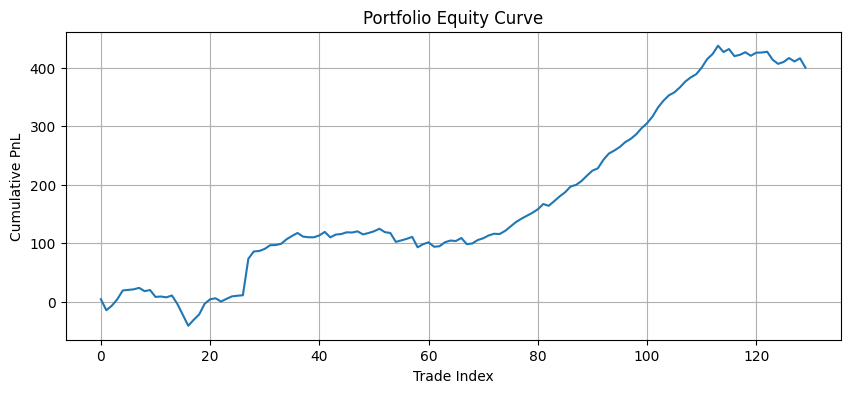

In [3]:
# 3. Equity Curve (assumes pnl column exists)
df['cumulative_pnl'] = df['pnl'].cumsum()
plt.figure(figsize=(10, 4))
plt.plot(df['cumulative_pnl'])
plt.title("Portfolio Equity Curve")
plt.xlabel("Trade Index")
plt.ylabel("Cumulative PnL")
plt.grid(True)
plt.show()

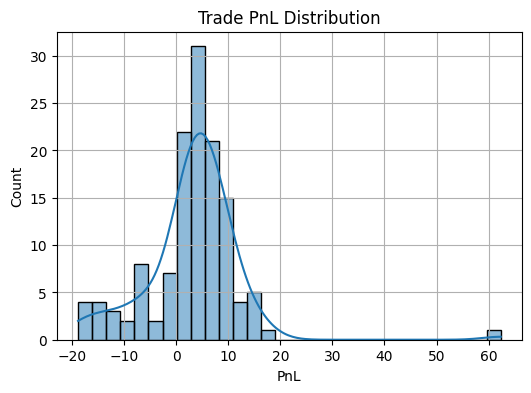

In [4]:
# 4. PnL Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['pnl'], bins=30, kde=True)
plt.title("Trade PnL Distribution")
plt.xlabel("PnL")
plt.grid(True)
plt.show()

In [5]:
# 5. Summary Metrics
total_trades = len(df)
wins = (df['pnl'] > 0).sum()
losses = (df['pnl'] <= 0).sum()
win_rate = wins / total_trades if total_trades else 0
avg_pnl = df['pnl'].mean()
expectancy = avg_pnl * win_rate
avg_duration = df['duration'].mean()

print(f"✅ Trades: {total_trades} | Wins: {wins} | Win Rate: {win_rate:.2%}")
print(f"📈 Avg PnL: {avg_pnl:.2f} | Expectancy: {expectancy:.2f}")
print(f"⏱️ Avg Duration: {avg_duration:.2f} bars")

✅ Trades: 130 | Wins: 100 | Win Rate: 76.92%
📈 Avg PnL: 3.08 | Expectancy: 2.37
⏱️ Avg Duration: 18.02 bars


In [6]:
# 6. Trades per Pair
pair_perf = df.groupby("symbol")["pnl"].agg(["count", "sum", "mean"]).sort_values("sum", ascending=False)
pair_perf.columns = ["# Trades", "Total PnL", "Avg PnL"]
display(pair_perf)

,# Trades,Total PnL,Avg PnL
symbol,,,
BZ - ZC,74,276.410062,3.735271
BZ - HH,2,74.829055,37.414528
ZW - HH,3,37.501173,12.500391
CL - HH,2,26.031536,13.015768
HH - ZC,2,22.973084,11.486542
BZ - QG,4,15.780614,3.945153
HH - QG,1,14.498562,14.498562
HH - HO,1,11.236018,11.236018
BZ - ZS,2,9.852270,4.926135


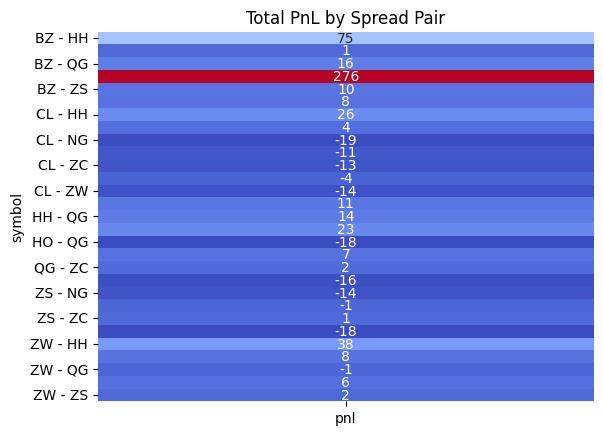

In [7]:
# 7. PnL heatmap by symbol (if enough data)
if len(pair_perf) >= 1:
    pivot = df.pivot_table(index="symbol", values="pnl", aggfunc="sum")
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm", cbar=False)
    plt.title("Total PnL by Spread Pair")
    plt.show()

In [8]:
# 8. Risk Metrics
print("\n📉 Risk Metrics from Final Portfolio")
display(risk)



📉 Risk Metrics from Final Portfolio


,Unnamed: 0,0
0,Expected Return,0.000405
1,Volatility,0.008405
2,CVaR (95%),-0.017654
3,Herfindahl Index,0.111111
4,Diversification Ratio,1.708240


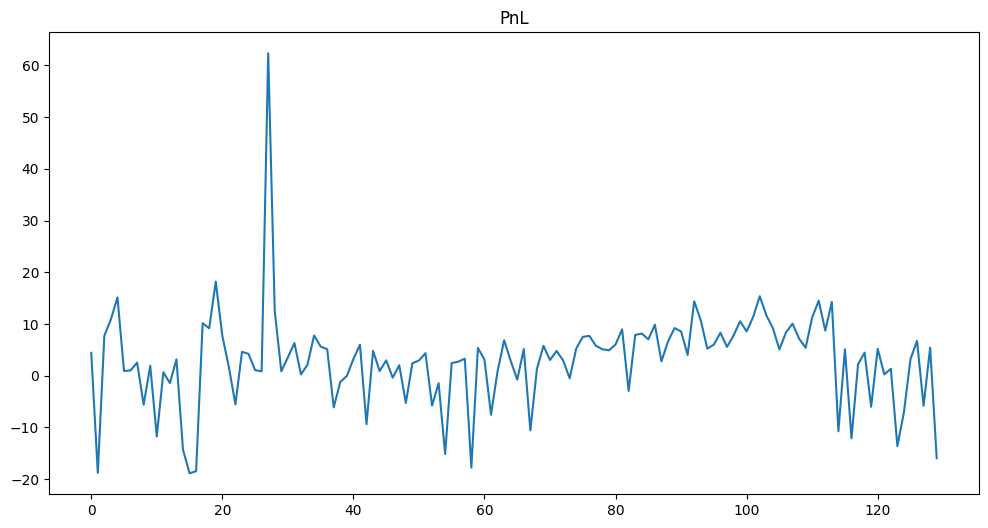

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(trades['pnl'])
plt.title('PnL')
plt.show()

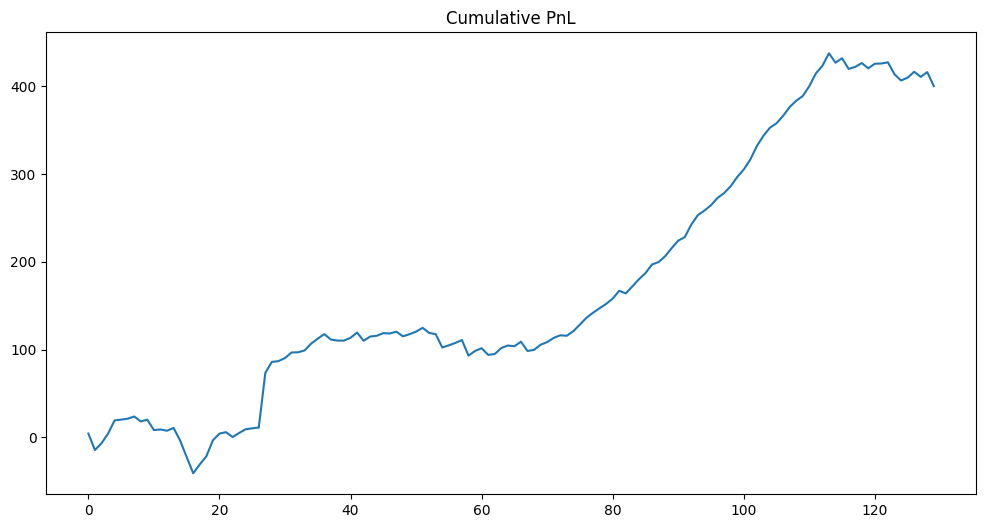

In [27]:
# Equity Curve
trades['cum_pnl'] = trades['pnl'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(trades['cum_pnl'])
plt.title('Cumulative PnL')
plt.show()

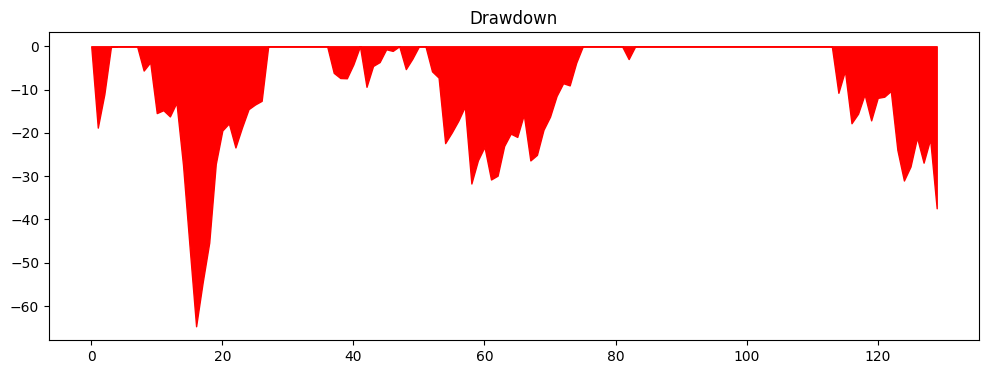

In [28]:
# Drawdown
roll_max = trades['cum_pnl'].cummax()
drawdown = trades['cum_pnl'] - roll_max
plt.figure(figsize=(12, 4))
plt.fill_between(drawdown.index, drawdown, color='red')
plt.title('Drawdown')
plt.show()

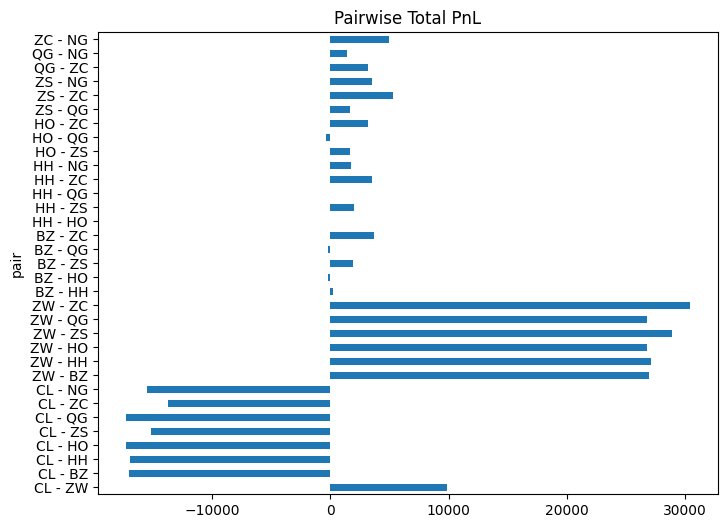

In [29]:
# Pairwise PnL
pairwise.set_index('pair')['total_pnl'].plot(kind='barh', figsize=(8,6))
plt.title('Pairwise Total PnL')
plt.show()